In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-81.16574565613459 51.5550846879037
0.6666971754380597 136.80415097405938
-22.244655823882667 -121.70229546851826
88.78522151339791 -137.60104304020985
16.270996160494406 -152.02762679684196
78.58772466841825 -150.47017639670213
-49.80024831359432 -81.75378038864974
9.51446884803093 139.16571419245474
-7.309892001942117 -126.78637886033465
58.22642657535161 115.12140208005229
-12.790597870040628 -48.36027826269435
-25.667564700035598 -103.5835570374963
-79.76044008901037 70.34028976237894
26.732649723737083 -56.040261415270535
-12.898708857154105 -111.35686692047487
86.88623175555131 110.61712213577141
74.6148602085809 1.9916755466706206
65.90281326376461 -154.3075942546874
-20.85012599827556 177.90562956483978
25.018734825956898 -122.48489162990353
-6.610392903936884 -165.28755413842777
-51.79304126901214 -162.1437080434322
20.7544479821308 25.759216161466043
15.030535603467754 139.5164931106678
-52.54026812967864 176.9545281198449
-22.662280332487185 78.22317542301863
38.441942281425

-37.2882603156185 109.91900900229638
-70.14666189847333 -100.61951163506106
-42.70773926500578 66.41835141728075
54.74904092670829 100.60740025786964
77.9009138579882 -6.536773237750708
46.70180024672513 -130.5612677430408
-79.74363494536418 -154.35211464610558
-86.90452261298567 38.63057516165307
-51.77558010606624 136.56574114724202
-25.678678042281064 40.63927585046281
-26.901632239530144 2.6812050647017713
40.64211562045159 122.65418928218452
53.46428004593312 -168.50771506165398
1.4753046423147111 -162.44726269290223
42.970509995367024 171.28707371747532
7.417039613005727 161.7880907331849
21.150808557290475 -122.21062209425656
58.45425914318565 169.7813858891638
86.35256375386888 171.84024310811708
-34.35152834330966 -178.35699300608098
-57.76376367529886 -164.34590157892848
63.951267465624426 -34.10653557684478
-6.4619461507005695 144.0378333950951
89.72194576953905 -170.60547447329077
-2.9004932566333537 -57.68522405889453
19.39001477272086 73.42976843098592
27.26370447599524 -

-25.196759373417507 34.30798929284654
-78.93865199429307 -108.0186641432897
79.72114947799002 157.71793894818285
14.549346828910558 4.146153724751429
23.30510722878185 81.04522229032102
39.225212406121216 121.61067061281886
76.16105280573476 -79.08033964434361
-25.906603418391683 15.069042875725927
86.43511771170918 175.95023719454014
76.94071870425236 -162.11252159188328
-70.01891505335895 60.783684685045074
-64.7970332109712 54.67754894069492
-5.736086352819427 61.63025341227177
27.9976712349509 33.99780387216873
31.90061828982755 28.670408515692714
21.075656740354532 -112.86142710868191
5.152656856798927 -74.20249935326272
-52.46885883372276 -81.40934471527908


In [4]:
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | biak
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | coihaique
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | kropotkin
Processing Record 11 of Set 1 | parana
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | bud
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | san quintin
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | marawi
Processing Record 22 of Set 1 | dunedin
Processing Record 23 of Set 1 | grand river south east
City n

Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | fort nelson
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | vestmannaeyjar
Processing Record 43 of Set 4 | northam
Processing Record 44 of Set 4 | togur
Processing Record 45 of Set 4 | haibowan
City not found. Skipping...
Processing Record 46 of Set 4 | lagoa
Processing Record 47 of Set 4 | black river
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | filadelfia
Processing Record 50 of Set 4 | butaritari
Processing Record 1 of Set 5 | jamestown
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | axim
Processing Record 5 of Set 5 | walvis bay
Processing Record 6 of Set 5 | kaiyuan
Processing Record 7 of Set 5 | makakilo city
Processing Record 8 of Set 5 | muravlenko
Processing Record 9 of Set 5 | ojinaga
Processing Record 10 of Set 5 | geraldton
Processing Record 11 of Set 5 

Processing Record 28 of Set 8 | clyde river
Processing Record 29 of Set 8 | namatanai
Processing Record 30 of Set 8 | luganville
Processing Record 31 of Set 8 | gimli
Processing Record 32 of Set 8 | calabozo
Processing Record 33 of Set 8 | gazojak
Processing Record 34 of Set 8 | hays
Processing Record 35 of Set 8 | khonuu
City not found. Skipping...
Processing Record 36 of Set 8 | khor
Processing Record 37 of Set 8 | listvyanskiy
Processing Record 38 of Set 8 | hihifo
City not found. Skipping...
Processing Record 39 of Set 8 | najran
Processing Record 40 of Set 8 | kaeo
Processing Record 41 of Set 8 | huttwil
Processing Record 42 of Set 8 | erenhot
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | roald
Processing Record 45 of Set 8 | grajau
Processing Record 46 of Set 8 | te anau
Processing Record 47 of Set 8 | ulaangom
Processing Record 48 of Set 8 | kapuskasing
Processing Record 49 of Set 8 | arman
Processing Record 50 of Set 8 | vila franca do campo
Processing R

Processing Record 13 of Set 12 | lata
Processing Record 14 of Set 12 | xiaoweizhai
Processing Record 15 of Set 12 | youghal
Processing Record 16 of Set 12 | shevchenko
Processing Record 17 of Set 12 | baijiantan
Processing Record 18 of Set 12 | tambo
Processing Record 19 of Set 12 | sosua
Processing Record 20 of Set 12 | dzilam gonzalez
Processing Record 21 of Set 12 | diplo
Processing Record 22 of Set 12 | kasempa
Processing Record 23 of Set 12 | pringsewu
Processing Record 24 of Set 12 | shelburne
Processing Record 25 of Set 12 | tanda
Processing Record 26 of Set 12 | oranjemund
Processing Record 27 of Set 12 | labuhan
Processing Record 28 of Set 12 | aripuana
Processing Record 29 of Set 12 | maunabo
Processing Record 30 of Set 12 | nyurba
Processing Record 31 of Set 12 | maldonado
Processing Record 32 of Set 12 | le vauclin
Processing Record 33 of Set 12 | mount pleasant
Processing Record 34 of Set 12 | caravelas
Processing Record 35 of Set 12 | nahrin
Processing Record 36 of Set 12

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,62.19,66,0,1.01,ZA,2022-07-16 18:47:16
1,Biak,-0.9131,122.8766,75.07,85,100,7.09,ID,2022-07-16 18:47:16
2,Rikitea,-23.1203,-134.9692,73.33,75,100,17.07,PF,2022-07-16 18:47:17
3,Tuktoyaktuk,69.4541,-133.0374,59.00,55,75,13.80,CA,2022-07-16 18:47:17
4,Hilo,19.7297,-155.0900,84.27,97,100,6.91,US,2022-07-16 18:47:18
5,Barrow,71.2906,-156.7887,37.42,87,100,6.91,US,2022-07-16 18:42:31
6,Coihaique,-45.5752,-72.0662,37.35,70,100,5.75,CL,2022-07-16 18:47:18
7,Airai,-8.9266,125.4092,55.04,91,55,3.89,TL,2022-07-16 18:47:19
8,Atuona,-9.8000,-139.0333,77.38,74,74,16.04,PF,2022-07-16 18:47:19
9,Kropotkin,45.4375,40.5756,70.11,72,100,10.63,RU,2022-07-16 18:47:19


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-07-16 18:47:16,-33.5906,26.8910,62.19,66,0,1.01
1,Biak,ID,2022-07-16 18:47:16,-0.9131,122.8766,75.07,85,100,7.09
2,Rikitea,PF,2022-07-16 18:47:17,-23.1203,-134.9692,73.33,75,100,17.07
3,Tuktoyaktuk,CA,2022-07-16 18:47:17,69.4541,-133.0374,59.00,55,75,13.80
4,Hilo,US,2022-07-16 18:47:18,19.7297,-155.0900,84.27,97,100,6.91
...,...,...,...,...,...,...,...,...,...
555,Pali,IN,2022-07-16 19:02:48,25.7667,73.3333,87.85,65,100,9.44
556,Dalianwan,CN,2022-07-16 19:02:48,39.0286,121.6950,75.24,73,0,4.47
557,Hurghada,EG,2022-07-16 19:01:14,27.2574,33.8129,82.00,36,0,24.70
558,Alexandria,EG,2022-07-16 18:59:29,31.2156,29.9553,78.76,69,0,12.66


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

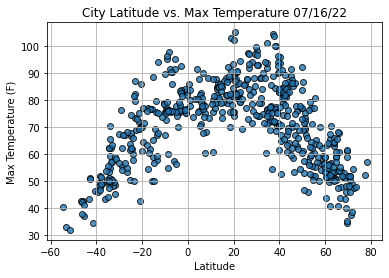

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

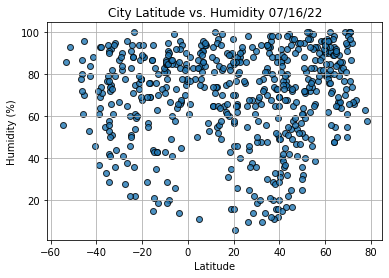

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

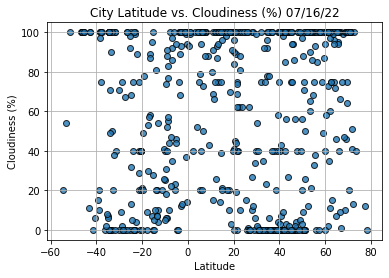

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

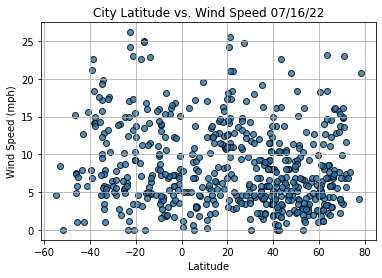

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Tuktoyaktuk,CA,2022-07-16 18:47:17,69.4541,-133.0374,59.00,55,75,13.80
4,Hilo,US,2022-07-16 18:47:18,19.7297,-155.0900,84.27,97,100,6.91
5,Barrow,US,2022-07-16 18:42:31,71.2906,-156.7887,37.42,87,100,6.91
9,Kropotkin,RU,2022-07-16 18:47:19,45.4375,40.5756,70.11,72,100,10.63
12,Saint George,US,2022-07-16 18:45:22,37.1041,-113.5841,104.43,20,0,5.75
...,...,...,...,...,...,...,...,...,...
555,Pali,IN,2022-07-16 19:02:48,25.7667,73.3333,87.85,65,100,9.44
556,Dalianwan,CN,2022-07-16 19:02:48,39.0286,121.6950,75.24,73,0,4.47
557,Hurghada,EG,2022-07-16 19:01:14,27.2574,33.8129,82.00,36,0,24.70
558,Alexandria,EG,2022-07-16 18:59:29,31.2156,29.9553,78.76,69,0,12.66


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Tuktoyaktuk,CA,2022-07-16 18:47:17,69.4541,-133.0374,59.00,55,75,13.80
4,Hilo,US,2022-07-16 18:47:18,19.7297,-155.0900,84.27,97,100,6.91
5,Barrow,US,2022-07-16 18:42:31,71.2906,-156.7887,37.42,87,100,6.91
9,Kropotkin,RU,2022-07-16 18:47:19,45.4375,40.5756,70.11,72,100,10.63
12,Saint George,US,2022-07-16 18:45:22,37.1041,-113.5841,104.43,20,0,5.75


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

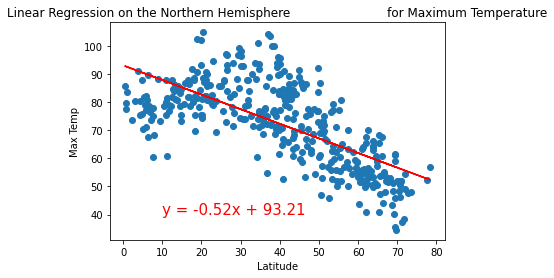

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

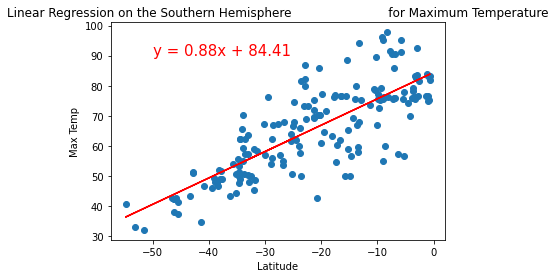

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

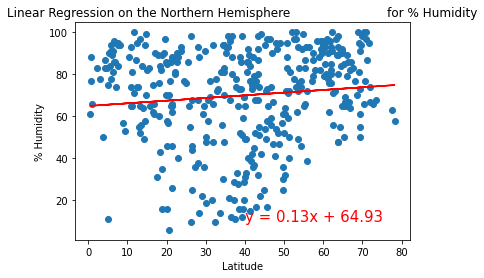

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

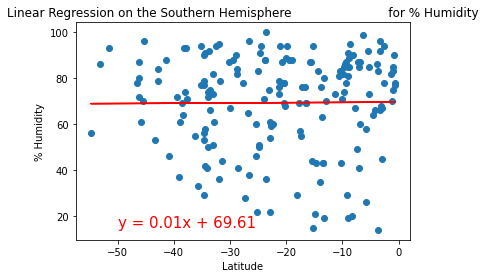

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

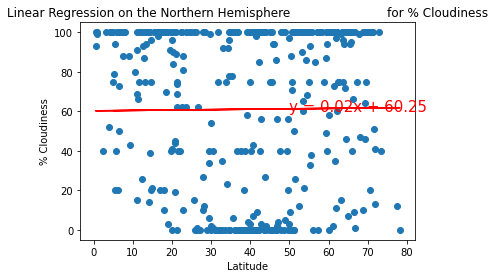

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,60))

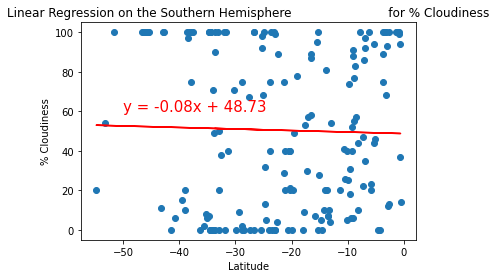

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

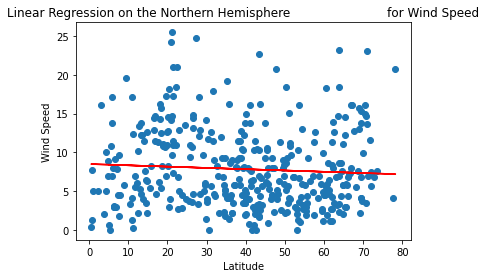

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

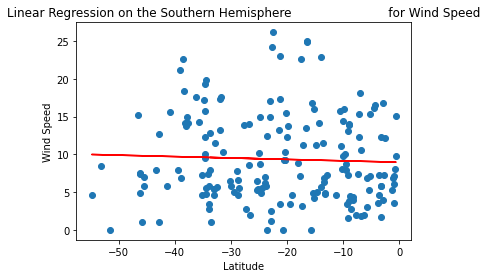

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))